### Joins

In a Spark application, you use the PySpark JOINS operation to join multiple dataframes.

 

The concept of a join operation is to join and merge or extract data from two different dataframes or data sources. You use the join operation in Spark to join rows in a dataframe based on relational columns. It adds the data that satisfies the relation to the range but excludes the data that does not satisfy the relation.
There are various types of PySpark JOINS that allow you to join numerous datasets and manipulate them as needed. The following are the most commonly used join operations:-

 

* Inner Join,

* Full Outer Join,

* Right Outer Join,

* Left Outer Join,

* Left Semi Join, etc.

### General Syntax for PySpark Join-
 

##### join(self, other, on=None, how=None). 

 

The PySpark join operation takes the following parameters. It returns a single DataFrame as a result-

 

* other- Dataframe on right side of the join operation

* on- a string for the joining column name

* how-  Inner, outer, full, full outer, left, left outer, right, right outer, left semi, and left anti are the only options. By default, its value is ‘inner’.

Let us now look at the various PySpark Join types and their syntax and examples.

Before diving into the PySpark Join types, we first create two datasets/tables- Emp and Dept. Column "emp_id" is unique in the emp dataset, and "dept id" is unique in the dept dataset. Also, the emp dataset's emp_dept_id has a relation to the dept dataset's dept_id.

 

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("Joins").getOrCreate()

22/10/18 17:44:13 WARN Utils: Your hostname, pallavi-xps resolves to a loopback address: 127.0.1.1; using 192.168.1.79 instead (on interface wlp2s0)
22/10/18 17:44:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/18 17:44:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/10/18 17:44:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/10/18 17:44:14 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/10/18 17:44:14 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [3]:
emp = [(1,"John","2018","10","M",3000), \

    (2,"Dario","2010","20","M",4000), \

    (3,"Ross","2010","10","M",1000), \

    (4,"Rachel","2005","40","F",2000), \

    (5,"Monica","2010","50","F",3000), \

 ]
empColumns = ["emp_id","name","year_joined", \

       "emp_dept_id","gender","salary"]

In [4]:
empDF = spark.createDataFrame(data=emp, schema = empColumns)

empDF.printSchema()

empDF.show(truncate=False)

root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



+------+------+-----------+-----------+------+------+
|emp_id|name  |year_joined|emp_dept_id|gender|salary|
+------+------+-----------+-----------+------+------+
|1     |John  |2018       |10         |M     |3000  |
|2     |Dario |2010       |20         |M     |4000  |
|3     |Ross  |2010       |10         |M     |1000  |
|4     |Rachel|2005       |40         |F     |2000  |
|5     |Monica|2010       |50         |F     |3000  |
+------+------+-----------+-----------+------+------+



In [5]:
dept = [("Finance",10), \

    ("Marketing",20), \

    ("Sales",30), \

    ("IT",40) \

  ]

In [6]:
deptColumns = ["dept_name","dept_id"]

deptDF = spark.createDataFrame(data=dept, schema = deptColumns)

deptDF.printSchema()

deptDF.show(truncate=False)

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



### PySpark Inner Join

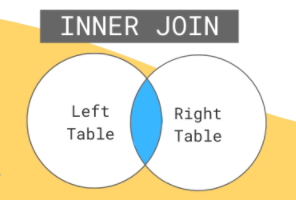

This is Apache Spark's default join type. The inner join removes everything that isn't common in both tables. It returns all data from both sides of the table that matches the join condition (predicate in the 'on' parameter). As a result, if one of the tables is empty, the result will be empty too.

 

The syntax for PySpark Inner join is as follows -

 

table1.join(table2,table1.column_name == table2.column_name,”inner”)

In [7]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
+------+------+-----------+-----------+------+------+---------+-------+



### PySpark Left Join / PySpark Left Outer Join

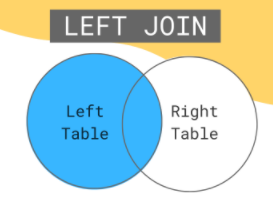

The PySpark outer join enables you to include rows from one table in the result set even if it cannot identify any matching rows from another table.

 

Even when there isn't a match in the right table, all left table rows remain unaffected in a PySpark left outer join. If there is a match in the right table, it returns the matching rows.

 

When the join expression doesn't match, it assigns null to that record and eliminates records from the correct dataset.

 

### The syntax for PySpark Left Outer join-

* left: table1.join(table2,table1.column_name ==  table2.column_name,”left”)

* leftouter: table1.join(table2,table1.column_name ==  table2.column_name,”leftouter”)

In [8]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"left").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
|     5|Monica|       2010|         50|     F|  3000|     null|   null|
+------+------+-----------+-----------+------+------+---------+-------+



In [9]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftouter").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
|     5|Monica|       2010|         50|     F|  3000|     null|   null|
+------+------+-----------+-----------+------+------+---------+-------+



### PySpark Right Join/ PySpark Right Outer Join

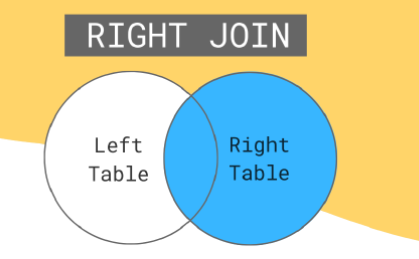

PySpark right outer join is the complete opposite of left join in that it returns all rows from the right dataset irrespective of match found on the left dataset. When join expressions don't match, it assigns null to that record and eliminates records from the left dataset. The output dataset is formed by joining all rows from the second dataset and only matching rows from the first dataset with respect to the second dataset.

 

The syntax for PySpark Right Outer join-

 

right: table1.join(table2,table1.column_name ==  table2.column_name,”right”)

rightouter: table1.join(table2,table1.column_name == table2.column_name,”rightouter”)

In [10]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"right").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|  null|  null|       null|       null|  null|  null|    Sales|     30|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
+------+------+-----------+-----------+------+------+---------+-------+



In [11]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"rightOuter").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|  null|  null|       null|       null|  null|  null|    Sales|     30|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
+------+------+-----------+-----------+------+------+---------+-------+



### PySpark Full Outer Join

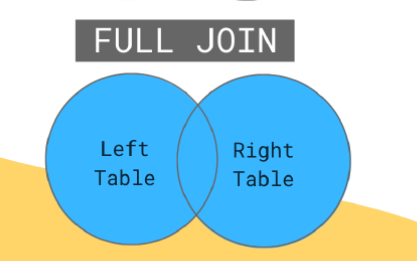

PySpark full outer join is used to keep records from both tables along with the associated zero values in the left/right tables. It is a rather unusual occurrence, but it's usually employed when you don't want to delete data from either table. If the join expression does not match, the record columns are null.

 

You can perform this join using three different keywords- outer, full, and fullouter.

 

The syntax for PySpark Full Outer join is as follows-

 

outer: table1.join(table2,table1.column_name ==  table2.column_name,”outer”)

full: table1.join(table2,table1.column_name == table2.column_name,”full”)

fullouter: table1.join(table2,table1.column_name ==  table2.column_name,”fullouter”)

 

In [12]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|  null|  null|       null|       null|  null|  null|    Sales|     30|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
|     5|Monica|       2010|         50|     F|  3000|     null|   null|
+------+------+-----------+-----------+------+------+---------+-------+



In [13]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"full").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|  null|  null|       null|       null|  null|  null|    Sales|     30|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
|     5|Monica|       2010|         50|     F|  3000|     null|   null|
+------+------+-----------+-----------+------+------+---------+-------+



In [14]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullOuter").show()

+------+------+-----------+-----------+------+------+---------+-------+
|emp_id|  name|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+------+-----------+-----------+------+------+---------+-------+
|     1|  John|       2018|         10|     M|  3000|  Finance|     10|
|     3|  Ross|       2010|         10|     M|  1000|  Finance|     10|
|     2| Dario|       2010|         20|     M|  4000|Marketing|     20|
|  null|  null|       null|       null|  null|  null|    Sales|     30|
|     4|Rachel|       2005|         40|     F|  2000|       IT|     40|
|     5|Monica|       2010|         50|     F|  3000|     null|   null|
+------+------+-----------+-----------+------+------+---------+-------+

